In [51]:
#Converts the excel from the Shalina&Sandven 2017 snow depth paper into .txt files for use with GMT for comparison
#Need to be connected to server smb://si1.cpom.ucl.ac.uk/cpnet/n4_cpdata
#Stored as /Volumes/n4_cpdata/scb/SNOW_DATA/SHALINA/ReadIn_Shalina_tif.ipynb
#Last modified by SB 31/01/18
import pandas
import pyproj
from pyproj import Proj, transform
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

Index(['X', 'Y', 'snow depth in cm', 'Unnamed: 3', 'Unnamed: 4',
       'X and Y = centers of the 100000x100000 m cells', 'Unnamed: 6'],
      dtype='object')


/Users/samanthabuzzard/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3459: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/samanthabuzzard/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3472: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


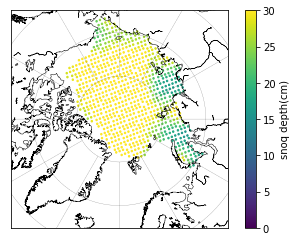

In [57]:
df = pandas.read_excel('/Volumes/n4_cpdata/scb/SNOW_DATA/SHALINA/grid_data.xlsx')
#print the column names
print (df.columns)
#get the values for a given column
X = df['X'].values #in polar stereographic
Y = df['Y'].values
snow = df['snow depth in cm'].values #in cm

3 Proj(init='epsg:3995') #close to polar stereographic but different latitude of origin/ central meridian so adapted above 
outProj = Proj(init='epsg:4326') #lat lon
xx, yy = transform(inProj,outProj, X, Y)

np.savetxt('/Volumes/n4_cpdata/scb/SNOW_DATA/SHALINA/lon.txt',np.transpose(xx))
np.savetxt('/Volumes/n4_cpdata/scb/SNOW_DATA/SHALINA/lat.txt',np.transpose(yy))
np.savetxt('/Volumes/n4_cpdata/scb/SNOW_DATA/SHALINA/snow.txt',np.transpose(snow/100))


m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l')
x1,y1=m(xx,yy)
m.drawparallels(np.arange(60,90,10), linewidth = 0.25, linestyle='solid', zorder=8)
m.drawmeridians(np.arange(0.,360.,30.), linewidth = 0.25, zorder=8)
m.drawcoastlines(linewidth=0.5)
m.hexbin(np.transpose(x1), np.transpose(y1), C=np.transpose(snow), bins=None, vmin=0, vmax=30)
cb = plt.colorbar()
cb.set_label('snoq depth(cm)')
plt.show() 